In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
from pyosrd import OSRD
from pyosrd.schedules import schedule_from_osrd

In [129]:
sim = OSRD(use_case='station_capacity2', dir='tmp')

[14:39:11,432] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:39:11,471] [INFO]              [FullInfra] parsing infra
[14:39:11,550] [INFO]              [FullInfra] adaptation to kotlin
[14:39:11,597] [INFO]              [FullInfra] loading signals
[14:39:11,604] [INFO]              [FullInfra] building blocks
[14:39:11,613] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[14:39:11,628] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.20
[14:39:11,695] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.21
[14:39:11,702] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:39:11,702] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


In [130]:
schedule = schedule_from_osrd(sim)

<Axes: xlabel='Time'>

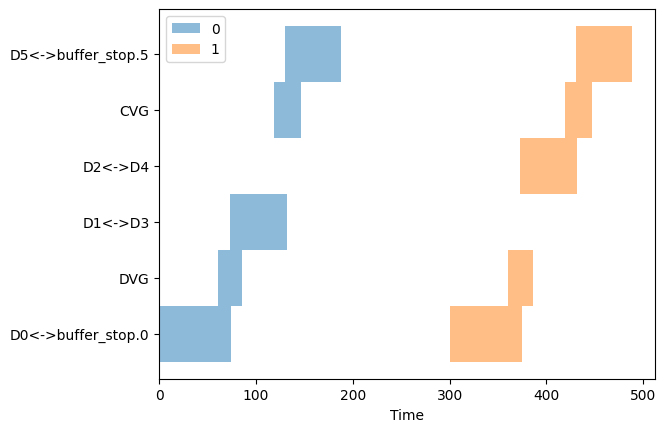

In [131]:
schedule.plot()

In [132]:
sim.reset_delays()
sim.add_delay('train0', 100, 280)
delayed = sim.delayed()

<Axes: xlabel='Time'>

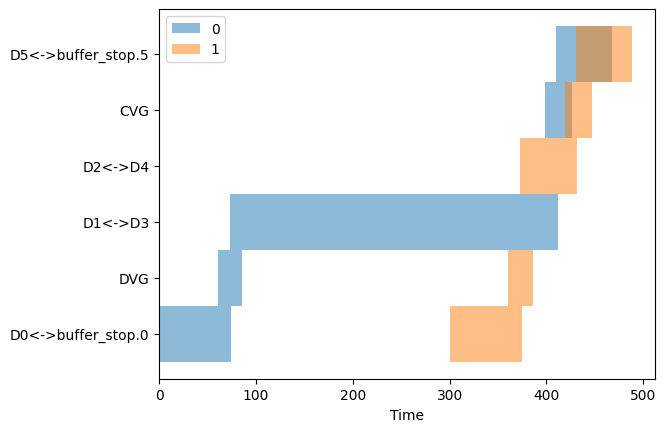

In [133]:
ds = schedule_from_osrd(delayed)
ds.plot()

In [134]:
from pyosrd.maths.intervals import intersections, overlapping

In [135]:
for i, r in ds.df.iterrows():
    intervals = [tuple(r[col].values) for col in ds.df.columns.levels[0]]
    overlaps = overlapping(intervals)
    if overlaps:
        print(i, overlaps)

CVG {(1, 0): (418.8098564805161, 426.808501466966)}
D5<->buffer_stop.5 {(1, 0): (430.3021936452671, 468.198745369405)}


In [139]:
def most_delayed(schedule, initial_schedule, train1, train2):
    if ds.train_delay(train1, initial_schedule) >= ds.train_delay(train2, initial_schedule):
        return train1
    return train2

In [161]:
%%time
action1 = ds.shift_train_after(1, 0, 'CVG')
action1.total_delay_at_stations(schedule, stations=['CVG'])
action1.has_conflicts(0)

CPU times: user 50.4 ms, sys: 30 µs, total: 50.4 ms
Wall time: 47.6 ms


False

In [162]:
%%time
action2 = ds.shift_train_after(0, 1, 'CVG')
action2.total_delay_at_stations(schedule, stations=['CVG'])
action2.has_conflicts(0)

CPU times: user 55.4 ms, sys: 0 ns, total: 55.4 ms
Wall time: 54.1 ms


False

In [157]:
%%time
sim.run()

[14:52:29,318] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:52:29,354] [INFO]              [FullInfra] parsing infra
[14:52:29,421] [INFO]              [FullInfra] adaptation to kotlin
[14:52:29,454] [INFO]              [FullInfra] loading signals
[14:52:29,460] [INFO]              [FullInfra] building blocks
[14:52:29,465] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[14:52:29,477] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.20
[14:52:29,526] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.21
[14:52:29,531] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:52:29,531] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json
CPU times: user 4.29 ms, sys: 0 ns, total: 4.29 ms
Wall time: 499 ms
